



# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

In this project we will analyze dataset collects information from 100k medical appointments in
Brazil and investigate a no-show medical appointments to find out which variables impact on the no-show.

Patient attributes in this analysis divide into :

- Dependent Variable : (No-show) that depends on other variables.
- Independent Variables :
      1- Scheduled Day.
      2- Appointment Day.
      3- Neighbourhood.
      4- SMS_received.
   
   ### Questions:
   
   <br/>
   
  - How early schedule has help patients showing up .<br/>
  - Do neighborhoods have an impact on patients attending . <br/>
  - How SMS Appointment Reminder affect on No-Show .<br/>


In [39]:
# import statements for all packages needed in this project.



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

>  In data wrangling ,the dataset will be loaded , checked for cleanliness, and then will be trimmed and cleaned up.

### General Properties

In [40]:
# Load dataset and print out a few lines.

df=pd.read_csv('noshow_appointments.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [41]:
# Show all types of data variables

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

as you can see above , its shows data types for this dataset is folat,integer and object .

In [42]:
# Perform operations to inspect data
# types and look for instances of missing or possibly errant data.


df.info() # a brief information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The output shows that the  dataset has no missing data that all columns contain 110527 and not less than the range of index which is 110527. 

To check again , isnull() function that return a boolean value indicating whether true with missing value and false no missing value.

In [43]:
df.isnull().any() # checking missing data . 

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [44]:
df.duplicated().sum() # count the dupilcated rows .

0

counting number of dupiclated rows equal zero that mean these is no index duplicate.  




### Data Cleaning 

Since there is no missing data and no dupicated rows , the cleaning to this dataset will be renaming columns for consistency and converting Patien ID to intget type and dates columns (ScheduledDay-AppointmentDay) to datetime type.

In [45]:
# rename column names.

df.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id','Gender':'gender',
                   'ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','Age':'age',
                   'Neighbourhood':'neighbourhood','Scholarship':'scholarship','Hipertension':'hypertension',
                   'Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handicap',
                   'SMS_received':'sms_received','No-show':'no_show'}, inplace=True)
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In renaming , all column names with lower case letters  and spreat words with underscore symbol.

In [46]:
# convert datatype
df['patient_id']= df.patient_id.astype(int)     # convert from float to integer type.
df['scheduled_day']=pd.to_datetime(df['scheduled_day']) # convert from object to datetime type .
df['appointment_day']= pd.to_datetime(df['appointment_day']) # convert from object to datetime type .



In [47]:
df.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

The datat types for Patient ID changed to integer type fand the date columns changed from object to datetime type .

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How early schedule has help patients showing up)

First, let's take a look at the distribution of patients on no-show status.

No     88208
Yes    22319
Name: no_show, dtype: int64

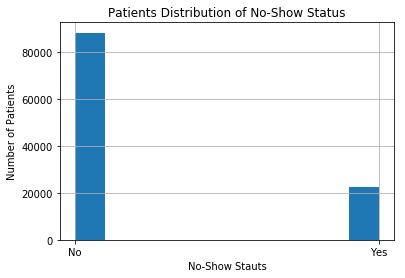

In [48]:
df['no_show'].hist();        # histogram no_show column.
plt.ylabel('Number of Patients');
plt.xlabel('No-Show Stauts');
plt.title("Patients Distribution of No-Show Status");
df['no_show'].value_counts()  # count no_show values .

The patient's distribution graph shows that the number of showing up around 80% and the number of missing appointments around 20%.'No’ status if the patient showed up to their appointment, and ‘Yes’ status if they did not show up.

To answer this question, we need to find a time gap between scheduled date and appointment date to observe influence on No-Show.

In [49]:





df['gap_days']= df['appointment_day'] - df['scheduled_day']  # adding new column that includes the diffrernce bewteen the two dates.

df['gap_days']= df['gap_days'].dt.days                       # Exclude hours from the difference.
df_gap = df[(df.gap_days >= 0)& (df.no_show == 'Yes')]       # New dataset with new condintions that include only no-show patients 
                                                             # and ignore negative values for gap_days column.

df_gap= df_gap.groupby('gap_days').no_show.count()           # group and count the total no_show for each value in df_gap. 




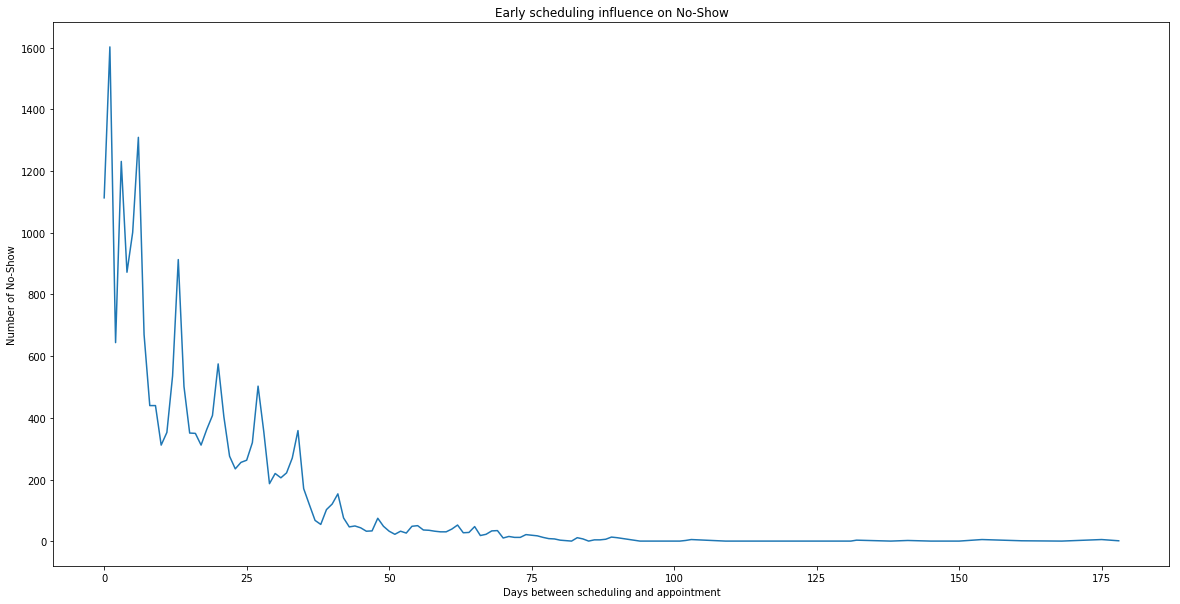

In [50]:
df_gap.plot(kind='line', figsize=(20,10));     # use line chart for visualization.
plt.ylabel('Number of No-Show');
plt.xlabel('Days between scheduling and appointment');
plt.title("Early scheduling influence on No-Show");



The chart shows the impact of early scheduling on the number of patients didn't show up so when the time between scheduling day and appointment day increased the number of no-show patients decreased.

### Research Question 2  (Do neighborhoods have an impact on patients attendance)

Explore neighborhoods data with all patients and with no-show patients to help in finding any correlation.

In [51]:
nbh_total_patients =df.neighbourhood.value_counts() # new dataset that count total number of patients in each Neighborhoods.




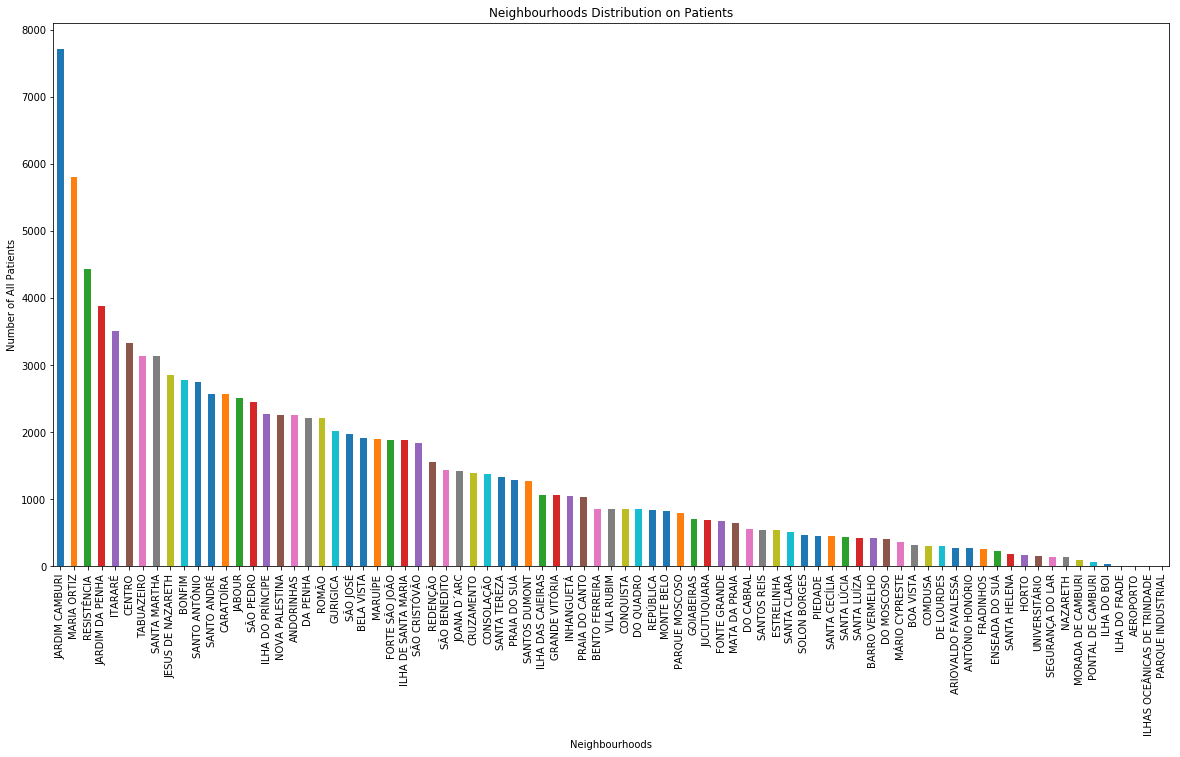

In [52]:
nbh_total_patients.plot(kind='bar', figsize=(20,10)); # use bar chart for visualization.

plt.ylabel('Number of All Patients');                
plt.xlabel('Neighbourhoods');
plt.title('Neighbourhoods Distribution on Patients');


The neighborhoods chart shows the number of patients in every neighborhood. Jardim Camburi neighborhood has the highest number of patients, and Parque Industrial has the lowest number of patients.

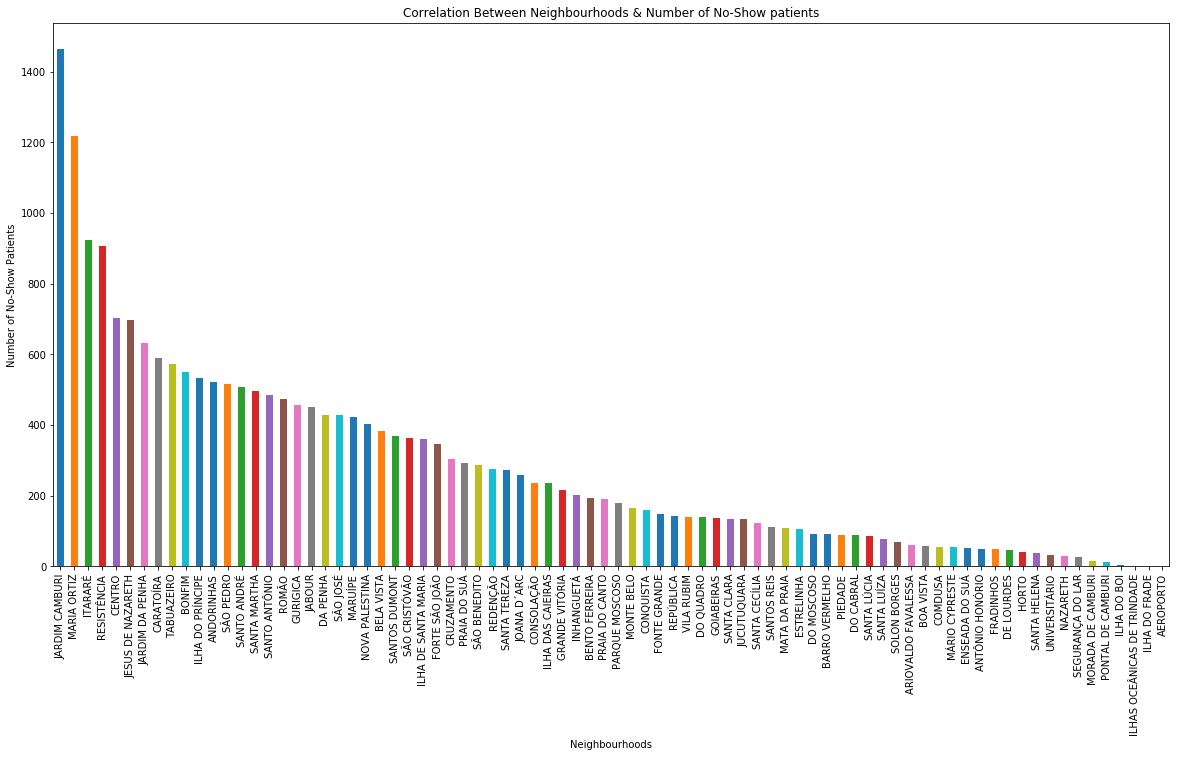

In [53]:
nbh_noshow = df[(df.no_show == 'Yes')]   # new dataset that include original dataset with condition no-show patients only .

nbh_total_noshow = nbh_noshow.neighbourhood.value_counts()  #new dataset that count total number of 
                                                            #no-show patients in each Neighbourhoos.

    
# x = pd.DataFrame(nbh_total_noshow)
# x.hist()
nbh_total_noshow.plot(kind='bar', figsize=(20,10));     # use bar chart for visualization.

plt.ylabel('Number of No-Show Patients');               
plt.xlabel('Neighbourhoods');
plt.title("Correlation Between Neighbourhoods & Number of No-Show patients");




This chart shows the number of no-show patients in every neighborhood. Jardim Camburi neighborhood has the highest number of no-show, and Aeroport neighborhood has the lowest number of no-show patients.

### Research Question 3  ( How SMS Appointment Reminder affect on No-Show) 

Here we will check the effectiveness of SMS reminder system to minimize no-show by know :

- Total number for no-show and show up.
- Number of patients who received SMS.<br/>
     (for both showing up and miss the appointment).<br/>
- Number of patients who didn't receive SMS.<br/>
     (for both showing up and miss the appointment).


In [1]:
df['sms_received'].hist();   # histogram sms_received column.
print(df['sms_received'].value_counts()) # count the number of SMS received and not received .

NameError: name 'df' is not defined

As you can see the number of didn't receive SMS is higher than the double the size of patients, who received SMS.<br/>
Note that '0' for Not received SMS and '1' for received SMS.

No     25698
Yes     9784
Name: no_show, dtype: int64


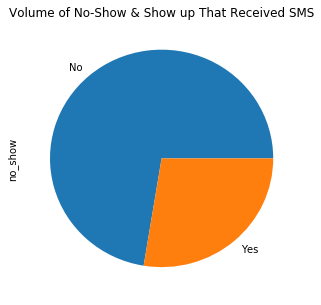

In [55]:
sms = df[(df.sms_received == 1)].no_show.value_counts()  # count the number of patient who recived SMS (no-show and show up).

sms.plot(kind='pie', figsize=(5,5)); # use bar chart for visualization.

plt.title("Volume of No-Show & Show up That Received SMS");

print(sms); # print the total the number of patient who recived SMS (no-show and show up) .

The Pie chart here illustrates the volume of no-show and show up for patients who received SMS.
The patients who are showing up received SMS less than 3/4 of the total patients who received SMS. 

In [56]:
no_sms = df[(df.sms_received == 0)].no_show.value_counts() # count the number of patient who didn't 
                                                           # recive SMS (no-show and show up).




No     62510
Yes    12535
Name: no_show, dtype: int64


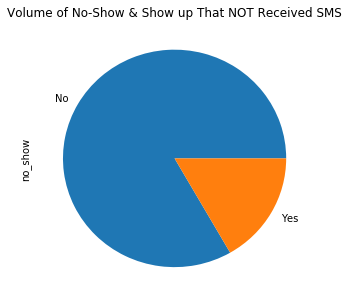

In [57]:
no_sms.plot(kind='pie', figsize=(5,5)); # use bar chart for visualization.

plt.title("Volume of No-Show & Show up That NOT Received SMS");

print(no_sms);  # print the total number of patient who didn't recive SMS (no-show and show up).

Here the volume of no-show and show up for patients who NOT received SMS. 
The patients who are showing up received SMS greater than 3/4 of the total patients who didn't receive SMS.

<a id='conclusions'></a>
## Conclusions

- For the first question ,The line chart shows that early schedule has help patients for showing up.
  When the period between the scheduled day and appointment day increased, the no-show with decreased with high fluctuation until the period reached around 50 days then continue steadily. <br/>
<br/>
- The neighborhoods chart didn't show any impact on patients attendance, the highest number of patients on Jardim Camburi         district symmetric with the highest number of no-show patients on same district. <br/>
<br/>
- The number of show up for patients didn't receive SMS grater than who received SMS. That's mean the SMS appointment reminder   system had no effect in reducing the number of no-show.

 ### Limitations:
 
       - The data set includes mistakes data like age with negtive value and appointment day before scheduled day.
       
       - Adding distances between the neighborhoods and the hospitable to the dataset may give good results on 
         the neighborhood's impact .
   
 
